# Статистика 2

In [12]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(20,8)}, style = 'whitegrid')

Задание 1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [3]:
conv = pd.read_csv('/home/jupyter-a-berezin-18/Statistics/Datasets/conversion.csv')

In [8]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Описание данных  

**ad_id** – идентификатор объявления (рекламы)  
**xyz_campaign_id** – идентификатор рекламной кампании в базе компании X  
**fb_campaign_id** – идентификатор кампании в Facebook  
**age** – возрастная группа, которой показывалась реклама  
**gender** – пол тех, кому показывалась реклама  
**interest** –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)  
**impressions** – число показов  
**clicks** – число кликов  
**spent** – сумма, которую компания потратила на показ объявления  
**total_conversion** – количество людей, которые заинтересовались продуктом после просмотра рекламы  
**approved_conversion** – количество людей, которые купили продукт после просмотра рекламы  

In [7]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [9]:
conv.shape

(1143, 11)

In [10]:
# Смотрим на пропущенные значения
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
# Число уникальных рекламных компаний
conv.xyz_campaign_id.nunique()

3

Определим типы переменных:

**age** – ранговая/порядковая  
**gender** – Номинативная  
**interest** – Номинативная  
**impressions** – Дискретная  
**clicks** – Дискретная  
**spent** – Непрерывная  
**total_conversion** – Дискретная  
**approved_conversion** – Дискретная  

Задание 2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


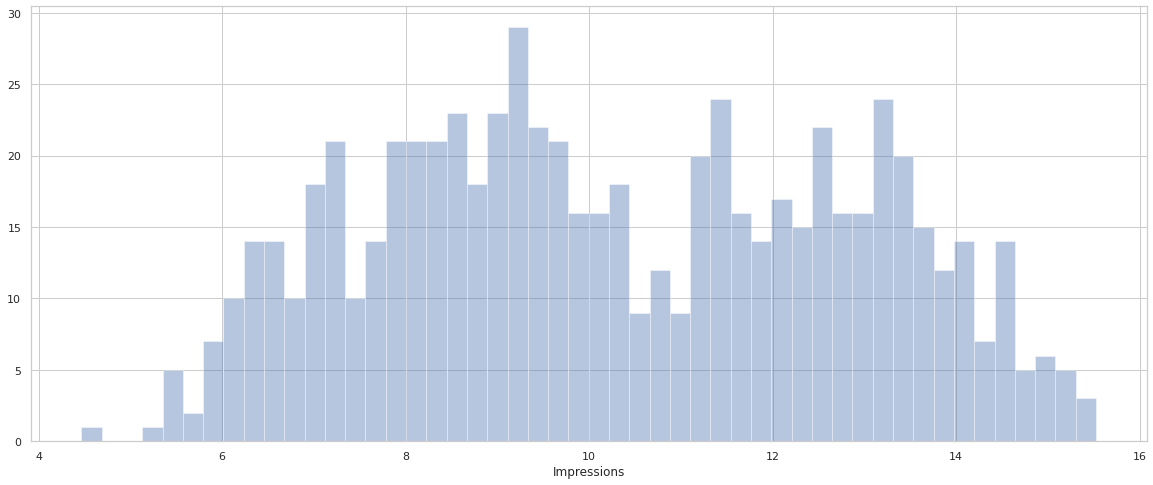

In [13]:
sns.distplot(np.log(conv.groupby('fb_campaign_id').Impressions.sum()), kde = False, bins = 50)

- Полученное распределение не является нормальным  
- Распределение бимодальное

Задание 3. Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

                                            CTR= impressions/clicks
 
Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [14]:
conv['CTR'] = conv.Clicks/conv.Impressions

In [15]:
conv.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [17]:
conv.iloc[conv.CTR.idxmax()]['ad_id']

738637

Задание 4.Проанализируйте CTR с разбивкой по рекламной кампании. Найдите распределение компании 916.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


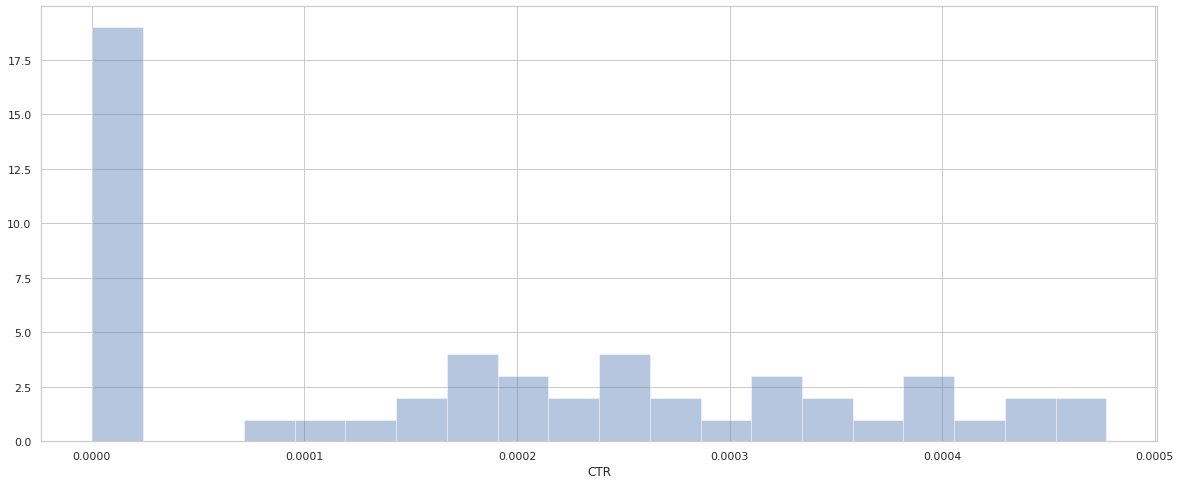

In [20]:
sns.distplot(conv.query('xyz_campaign_id == 916').CTR, kde = False, bins = 20)

Задание 6. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

                                                CPC = clicks/spent

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [21]:
conv['cpc'] = (conv.Spent/conv.Clicks)

In [22]:
conv.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


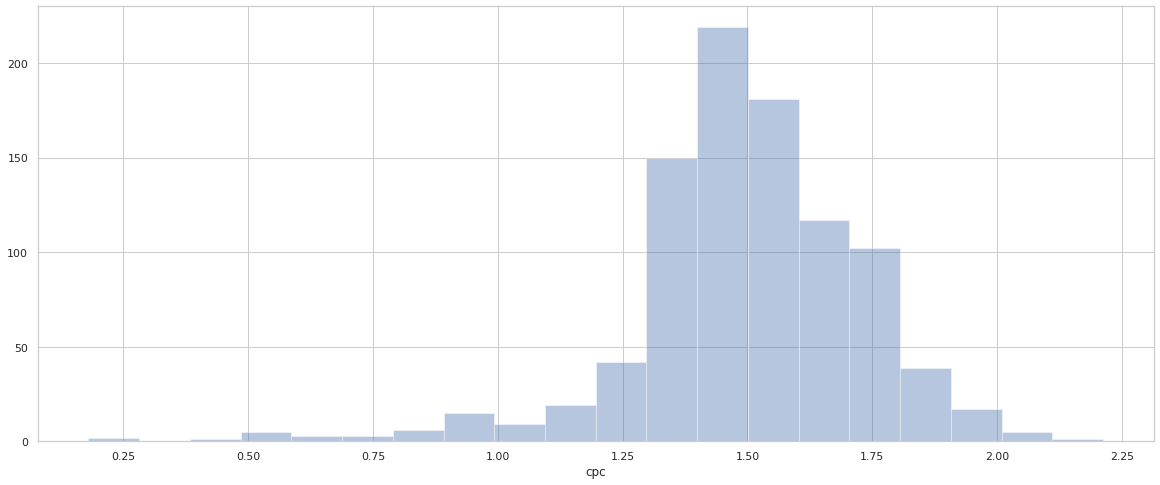

In [23]:
sns.distplot(conv.dropna().cpc, bins = 20, kde = False)

In [24]:
round(ss.iqr(conv.cpc, nan_policy = 'omit'), 2)

0.25

Задание 7. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


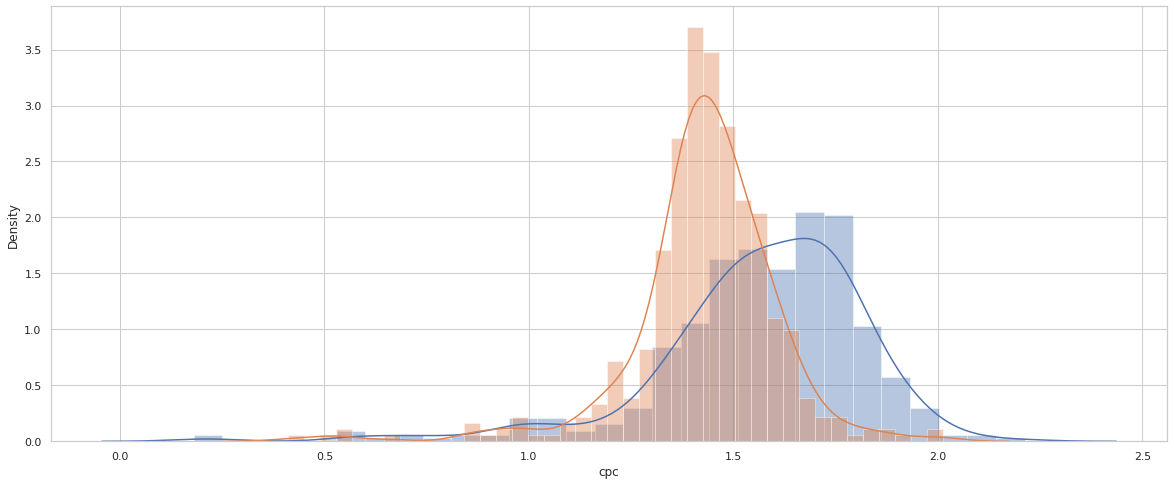

In [27]:
sns.distplot(conv.query('gender == "M"').cpc.dropna())
sns.distplot(conv.query('gender == "F"').cpc.dropna())

Задание 8. Посчитайте конверсию из клика в покупку. 

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [28]:
conv['cr_app'] = ((conv.Approved_Conversion/conv.Clicks).mul(100))

In [ ]:
conv.query('ad_id == ')

In [45]:
df['CR'] = round((df.Approved_Conversion/df.Clicks)*100, 2)

In [30]:
round(conv.query('ad_id == 1121814')['cr_app'], 2)

860    3.09
Name: cr_app, dtype: float64